In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Loading the dataset

In [40]:
housing_data = pd.read_csv('/content/housing_data.csv')
housing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Selecting the relevant columns


In [43]:
features = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
target = 'SalePrice'

In [44]:
housing_data[features].head(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,856,856,854,1710,1,0,2,1,3
1,1262,1262,0,1262,0,1,2,0,3
2,920,920,866,1786,1,0,2,1,3
3,756,961,756,1717,1,0,1,0,3
4,1145,1145,1053,2198,1,0,2,1,4


# Check for Missing Values
* Identify any missing data in your columns. Missing data can significantly impact the performance of your model.

In [45]:
housing_data[features].isnull().sum()

TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

# Distribution of Features

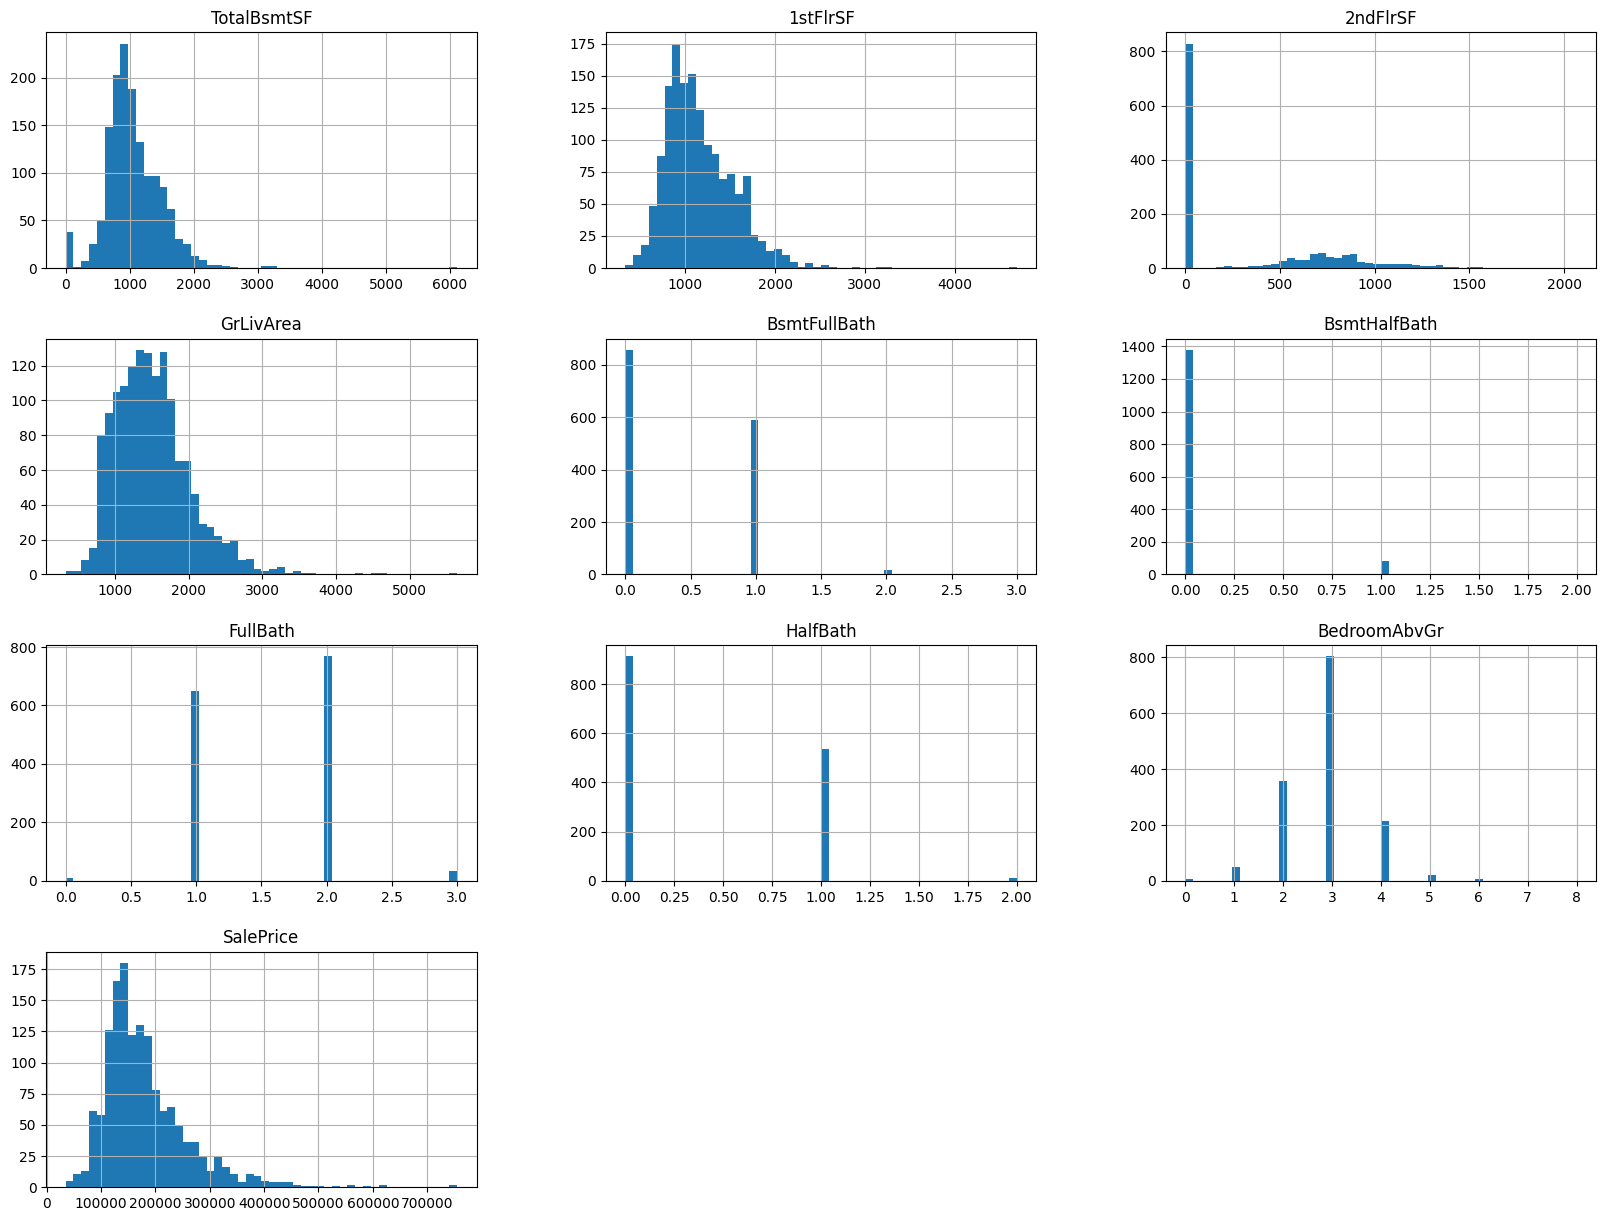

In [46]:
housing_data[features + [target]].hist(bins=50, figsize=(20,15))
plt.show()

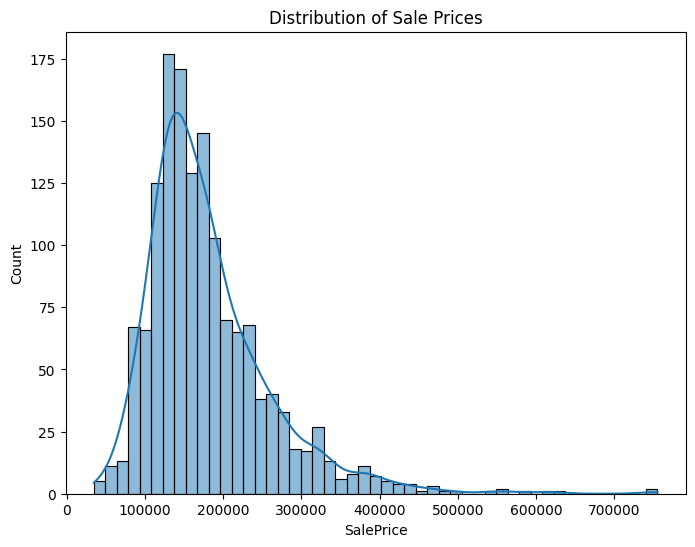

Skewness of SalePrice: 1.8828757597682129


In [47]:
# Distribution of the Sale price
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

# Check for skewness
print("Skewness of SalePrice:", housing_data['SalePrice'].skew())


Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.


*    A skewness greater than 0, as in our case, indicates that there is more weight in the right tail of the distribution. This typically means that the median of the distribution is less than the mean, and the data has a long tail to the right.
* A skewed target variable can lead to a skewed error term, potentially violating the model's assumptions and affecting the accuracy and efficiency of the linear regression model.



# Log Transformation for handling skewness

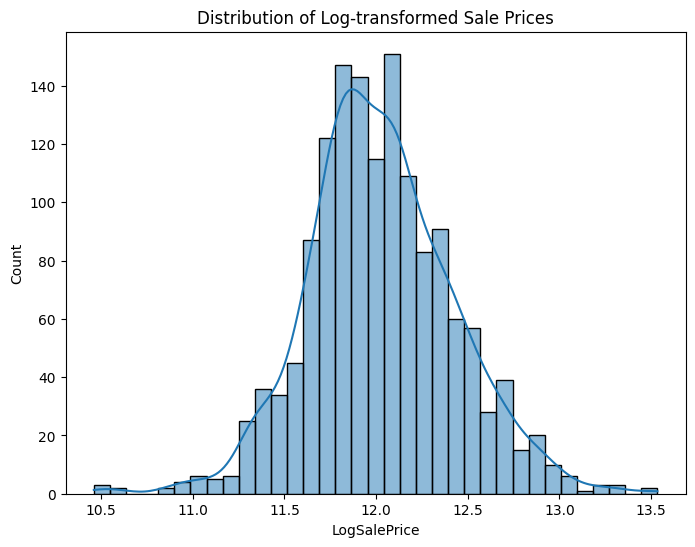

Skewness of Log-transformed SalePrice: 0.12133506220520406


In [48]:
housing_data['LogSalePrice'] = np.log(housing_data['SalePrice'])

# Checking the new distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['LogSalePrice'], kde=True)
plt.title('Distribution of Log-transformed Sale Prices')
plt.show()

# Checking new skewness
new_skewness = housing_data['LogSalePrice'].skew()
print("Skewness of Log-transformed SalePrice:", new_skewness)

In [49]:
X = housing_data[features]
y = housing_data['LogSalePrice']

# Splitting data into training and testing sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model

In [51]:
model = LinearRegression()

Train the Model

In [52]:
model.fit(X_train, y_train)

LinearRegression()

Predict on the test set

In [53]:
y_pred = model.predict(X_test)

In [54]:
# mean squared error and R-squared values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

# Transform predictions back to original scale
predicted_prices = np.exp(y_pred)

Root Mean Squared Error: 0.21816331278913131
R^2 Score: 0.744952930023518


# Actual vs Predicted plot

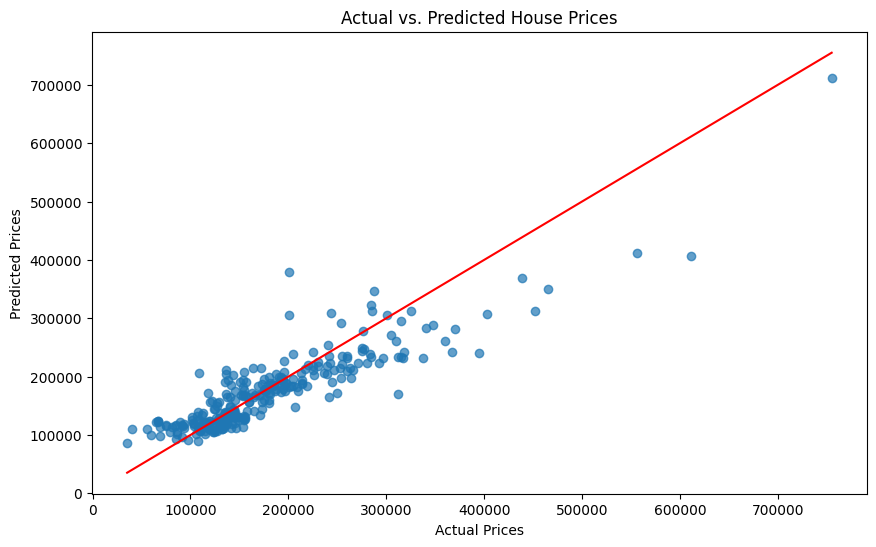

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), predicted_prices, alpha=0.7)

min_val = min(np.exp(y_test).min(), predicted_prices.min())
max_val = max(np.exp(y_test).max(), predicted_prices.max())

plt.plot([min_val, max_val], [min_val, max_val], 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()
